In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('./input/Stocks/a.us.txt', sep=',', header=0).fillna(0)
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0


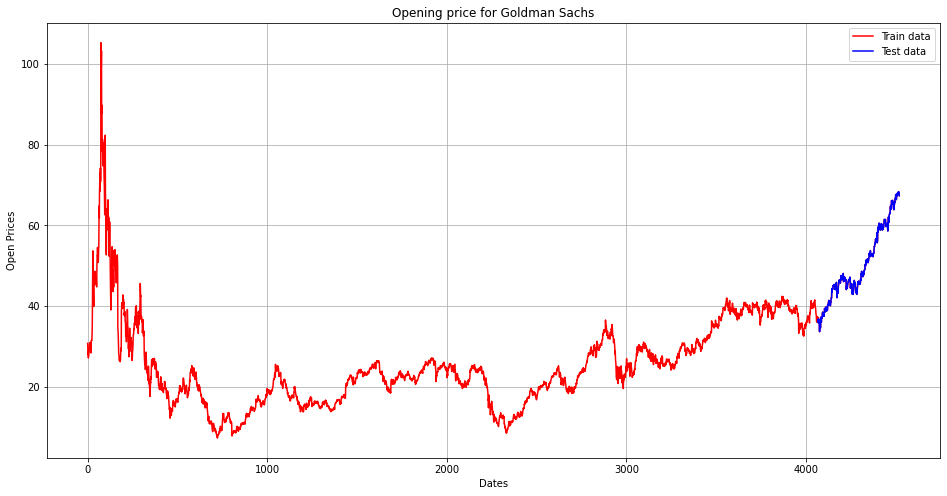

In [3]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'red', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()
plt.title('Opening price for Goldman Sachs')
plt.show()

In [4]:
def shiftLbyn(arr, n=0):
    return arr[n::] + arr[:n:]

def shiftRbyn(arr, n=0):
    return arr[n:len(arr):] + arr[0:n:]
#print(test_data['Open'].values.tolist())

#print(test_data['Open'].corr(test_data['Open'],method='pearson'))

test_lag1=shiftLbyn(test_data['Open'].values.tolist(), 1)
test_lag2=shiftLbyn(test_data['Open'].values.tolist(), 2)
test_lag3=shiftLbyn(test_data['Open'].values.tolist(), 3)

df=pd.DataFrame()
df['data']=test_data['Open'].values.tolist()
df['test_lag1']=test_lag1
df['test_lag2']=test_lag2
df['test_lag3']=test_lag3

print("Lag 1 correlation: "+str(df['data'].corr(df['test_lag1'])))
print("Lag 2 correlation: "+str(df['data'].corr(df['test_lag2'])))
print("Lag 3 correlation: "+str(df['data'].corr(df['test_lag3'])))

Lag 1 correlation: 0.9845377903703115
Lag 2 correlation: 0.9686656802473524
Lag 3 correlation: 0.9533806102132425


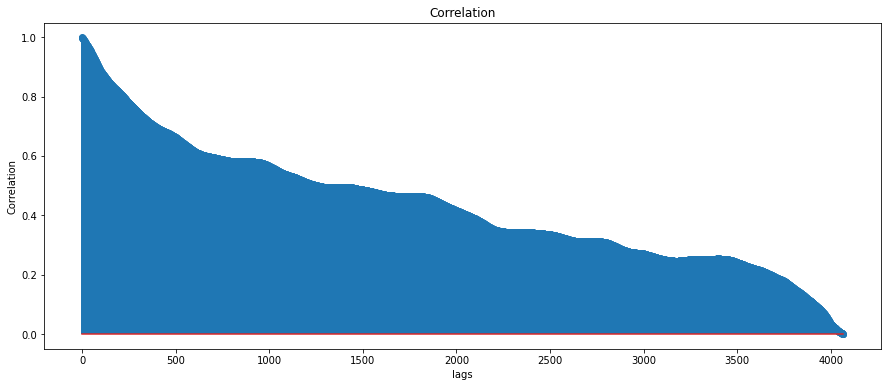

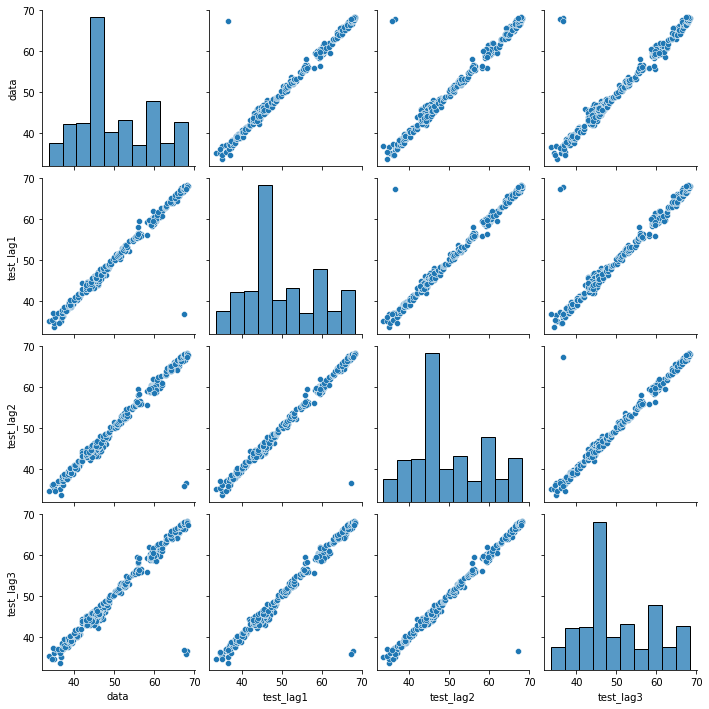

In [5]:
##plot correlation with lags
tr=train_data['Open'].values.tolist()
dff=pd.DataFrame()
dff['cor']=np.correlate(tr,tr,mode='full')
dff['cor']=dff['cor'].apply(lambda x:x/dff['cor'].max())

plt.stem(dff['cor'][int((len(dff['cor'])+1)/2):])
plt.xlabel('lags')
plt.ylabel('Correlation')
plt.title('Correlation')
plt.show()

sns.pairplot(df)

MSE: 0.37438432578135605
MAE: 0.44374177488869165
RMSE: 0.6118695333004872

Time elapsed:11.849051713943481 s


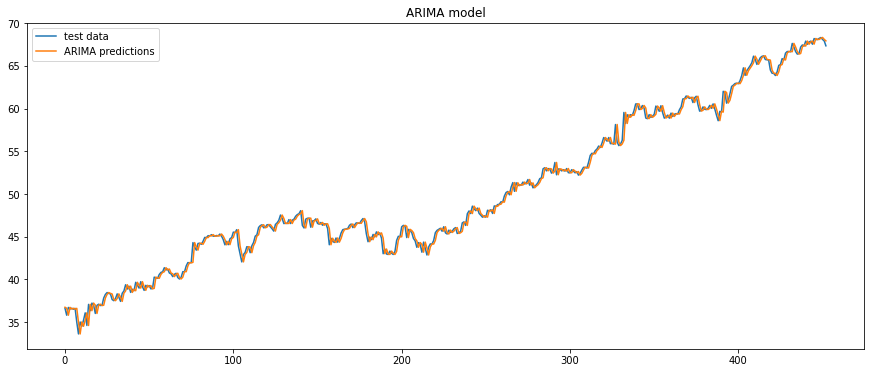

"\nFutureWarning: \nstatsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have\nbeen deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .\nbetween arima and model) and\nstatsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.\n\nstatsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and\nis both well tested and maintained.\n\nTo silence this warning and continue using ARMA and ARIMA until they are\nremoved, use:\n\nimport warnings\nwarnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',\n                        FutureWarning)\nwarnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',\n                        FutureWarning)\n\n  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)\n\n"

In [6]:
import time
#from statsmodels.tsa.arima.model import ARIMA

start = time.time()

train_arima = train_data['Open']
test_arima = test_data['Open']
#print(test_arima)
history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y.iloc[0])
start = time.time()

# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y.iloc[i]
    history.append(obs)
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))
#import time

end = time.time()

elapsed = end - start
print("\nTime elapsed:" +str(elapsed)+" s")
#print("\nResult Summary: ")
#print(model_fit.summary())

plt.plot(y.values,label='test data')
plt.plot(predictions,label='ARIMA predictions')
plt.title('ARIMA model')
plt.legend()
plt.show()

'''
FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

'''

MSE: 1.117231212175197
MAE: 0.48626535433070867
RMSE: 1.0569915856690615
Time elapsed:0.45873212814331055 s


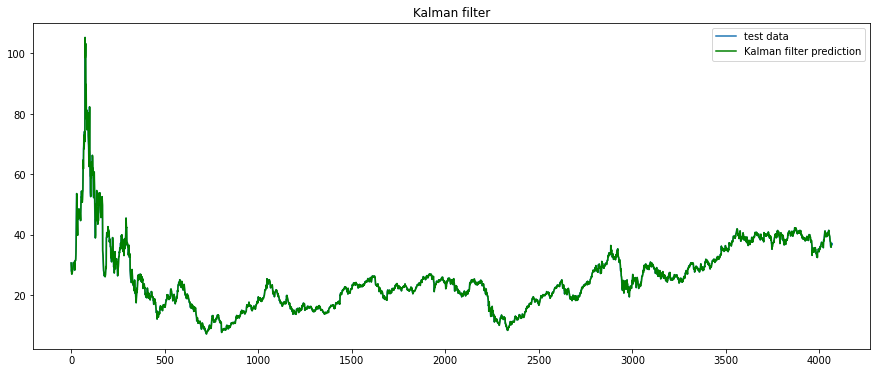

4064
4068


In [10]:
#Kalman filter

import time
start = time.time()

test_dataa=train_arima.values

A=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
const=0
P_init=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
R=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
Q=[[10**-7,0,0,0],[0,10**-7,0,0],[0,0,10**-7,0],[0,0,0,10**-7]]
KF=[]
update=[]
KF.append(test_dataa[0])
KF.append(test_dataa[1])
KF.append(test_dataa[2])
KF.append(test_dataa[4])

for i in range(4,len(test_dataa)-4):
    x_init=[[test_dataa[i-4]],[test_dataa[i-3]],[test_dataa[i-2]],[test_dataa[i-1]]]
    #prediction
    #print(i)
    prediction=np.dot(A,x_init)+const
    #print(x_min[1])
    P_min=np.dot(np.dot(A,P_init),A)+Q
    KF.append(prediction[3].tolist()[0])
    #measurement update
    y_min=prediction[3]
    #print(y_min)
    P_y_min=P_min+R
    K_gain=np.dot(P_min,np.linalg.inv(P_y_min))[3][3]
    #print(K_gain)
    x_init=prediction-K_gain*(y_min-test_dataa[i])
    update.append(x_init)
    #x_init=np.array([])
    #print(x_init)
    P_init=P_min-K_gain*P_min
    
#print(KF[0:10])   
#print(test_dataa[0:10])
#df['KF']=KF

mse = mean_squared_error(KF, test_dataa[0:len(test_dataa)-4])
print('MSE: '+str(mse))
mae = mean_absolute_error(KF, test_dataa[0:len(test_dataa)-4])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(KF, test_dataa[0:len(test_dataa)-4]))
print('RMSE: '+str(rmse))

end = time.time()

elapsed = end - start
print("Time elapsed:" +str(elapsed)+" s")

plt.plot(test_dataa,label='test data')
plt.plot(KF,'green',label='Kalman filter prediction')
plt.title('Kalman filter')
plt.legend()
plt.show()

print(len(KF))
print(len(train_arima))